In [1]:
import ipywidgets
print(ipywidgets.__version__)

8.1.5


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interact, widgets
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
names = [
    'Aarav', 'Aditi', 'Arjun', 'Ananya', 'Dhruv', 'Diya', 
    'Ishaan', 'Isha', 'Krishna', 'Kavya', 'Mira', 'Mihir',
    'Neha', 'Nikhil', 'Priya', 'Pranav', 'Riya', 'Rohan'
]

df = pd.DataFrame({
    'Name': names,
    'Age': np.random.randint(18, 23, len(names)),
    'Grade': np.random.randint(65, 100, len(names)),
    'Subject': np.random.choice(['Math', 'Physics', 'Chemistry'], len(names))
})

In [4]:
display(df)

,Name,Age,Grade,Subject
0,Aarav,20,66,Chemistry
1,Aditi,20,65,Math
2,Arjun,19,86,Chemistry
3,Ananya,20,89,Math
4,Dhruv,20,70,Physics
5,Diya,22,65,Math
6,Ishaan,19,95,Physics
7,Isha,20,95,Physics
8,Krishna,19,91,Chemistry
9,Kavya,18,71,Math


In [5]:
print("\nBasic Subsetting Examples:")
print("\nMath Students:")
math_students = df[df['Subject'] == 'Math']
math_students


Basic Subsetting Examples:

Math Students:


,Name,Age,Grade,Subject
1,Aditi,20,65,Math
3,Ananya,20,89,Math
5,Diya,22,65,Math
9,Kavya,18,71,Math
10,Mira,22,84,Math
13,Nikhil,22,99,Math
16,Riya,22,88,Math


In [6]:
print("\nHigh Performers (Grade > 85):")
high_performers = df[df['Grade'] > 85]
display(high_performers)


High Performers (Grade > 85):


,Name,Age,Grade,Subject
2,Arjun,19,86,Chemistry
3,Ananya,20,89,Math
6,Ishaan,19,95,Physics
7,Isha,20,95,Physics
8,Krishna,19,91,Chemistry
13,Nikhil,22,99,Math
16,Riya,22,88,Math


In [7]:
@interact
def filter_by_subject(subject=['All'] + list(df['Subject'].unique())):
    print(f"Showing {subject} students")
    """Simple filtering using @interact"""
    if subject == 'All':
        return df
    return df.query('Subject == @subject')

interactive(children=(Dropdown(description='subject', options=('All', 'Chemistry', 'Math', 'Physics'), value='…

In [33]:
@interact
def filter_students(subject=['All'] + list(df['Subject'].unique()), min_grade=(0, 100, 5)):
    """More controlled filtering using interactive"""
    print(f"Showing {subject} students with grade >= {min_grade}")
    filtered = df if subject == 'All' else df.query('Subject == @subject')
    out = filtered.query('Grade >= @min_grade')
    return out

interactive(children=(Dropdown(description='subject', options=('All', 'Physics', 'Math', 'Chemistry'), value='…

In [34]:
def filter_students_via_interactive(subject, min_grade):
    """More controlled filtering using interactive"""
    print(f"Showing {subject} students with grade >= {min_grade}")
    filtered = df if subject == 'All' else df.query('Subject == @subject')
    out = filtered.query('Grade >= @min_grade')
    return out

# Use interactive to create the widget
student_filter_viz = interactive(
    filter_students_via_interactive,
    subject=['All'] + list(df['Subject'].unique()),
    min_grade=(0, 100, 5)
)

In [35]:
student_filter_viz

interactive(children=(Dropdown(description='subject', options=('All', 'Physics', 'Math', 'Chemistry'), value='…


Basic Plot (Direct Function Call):


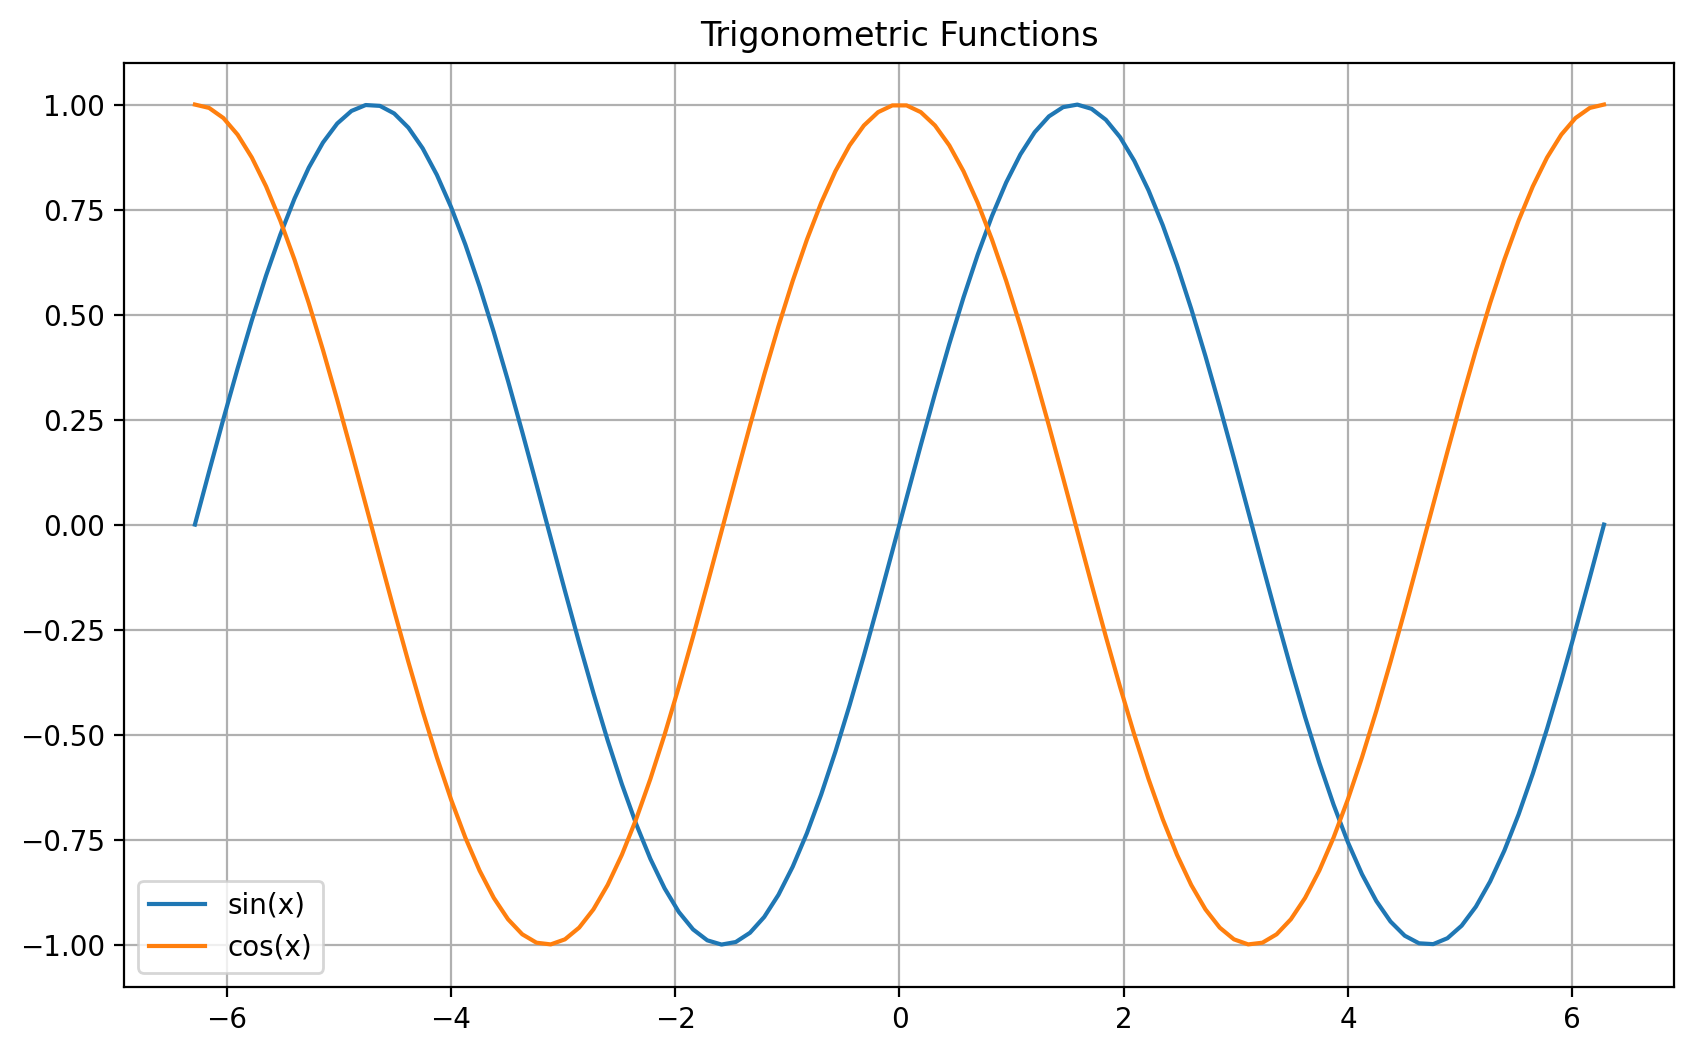

In [12]:
def plot_wave(x_start=-2*np.pi, x_end=2*np.pi, num_points=100):
    """Basic plotting function"""
    x = np.linspace(x_start, x_end, num_points)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, np.sin(x), label='sin(x)')
    plt.plot(x, np.cos(x), label='cos(x)')
    plt.grid(True)
    plt.legend()
    plt.title('Trigonometric Functions')
    plt.show()

# 6. Using Plotting Function Directly
# ================================
print("\nBasic Plot (Direct Function Call):")
plot_wave()

In [13]:
print("\nPlotting with @interact:")

@interact
def plot_wave_interact(num_points=(5, 200, 5)):
    """Simple interactive plotting with @interact"""
    plot_wave(num_points=num_points)



Plotting with @interact:


interactive(children=(IntSlider(value=100, description='num_points', max=200, min=5, step=5), Output()), _dom_…

In [36]:

def plot_wave_advanced(func_type='sine', num_points=100, color='blue', show_grid=True):
    """Advanced plotting with more control"""
    x = np.linspace(-2*np.pi, 2*np.pi, num_points)
    
    plt.figure(figsize=(10, 6))
    if func_type == 'sine':
        y = np.sin(x)
        title = 'Sine Wave'
    elif func_type == 'cosine':
        y = np.cos(x)
        title = 'Cosine Wave'
    else:  # both
        plt.plot(x, np.sin(x), label='sin(x)', color='blue')
        plt.plot(x, np.cos(x), label='cos(x)', color='red')
        title = 'Both Waves'
        plt.legend()
        plt.title(title)
        plt.grid(show_grid)
        plt.show()
        return
    
    plt.plot(x, y, color=color, label=func_type)
    plt.title(title)
    plt.legend()
    plt.grid(show_grid)

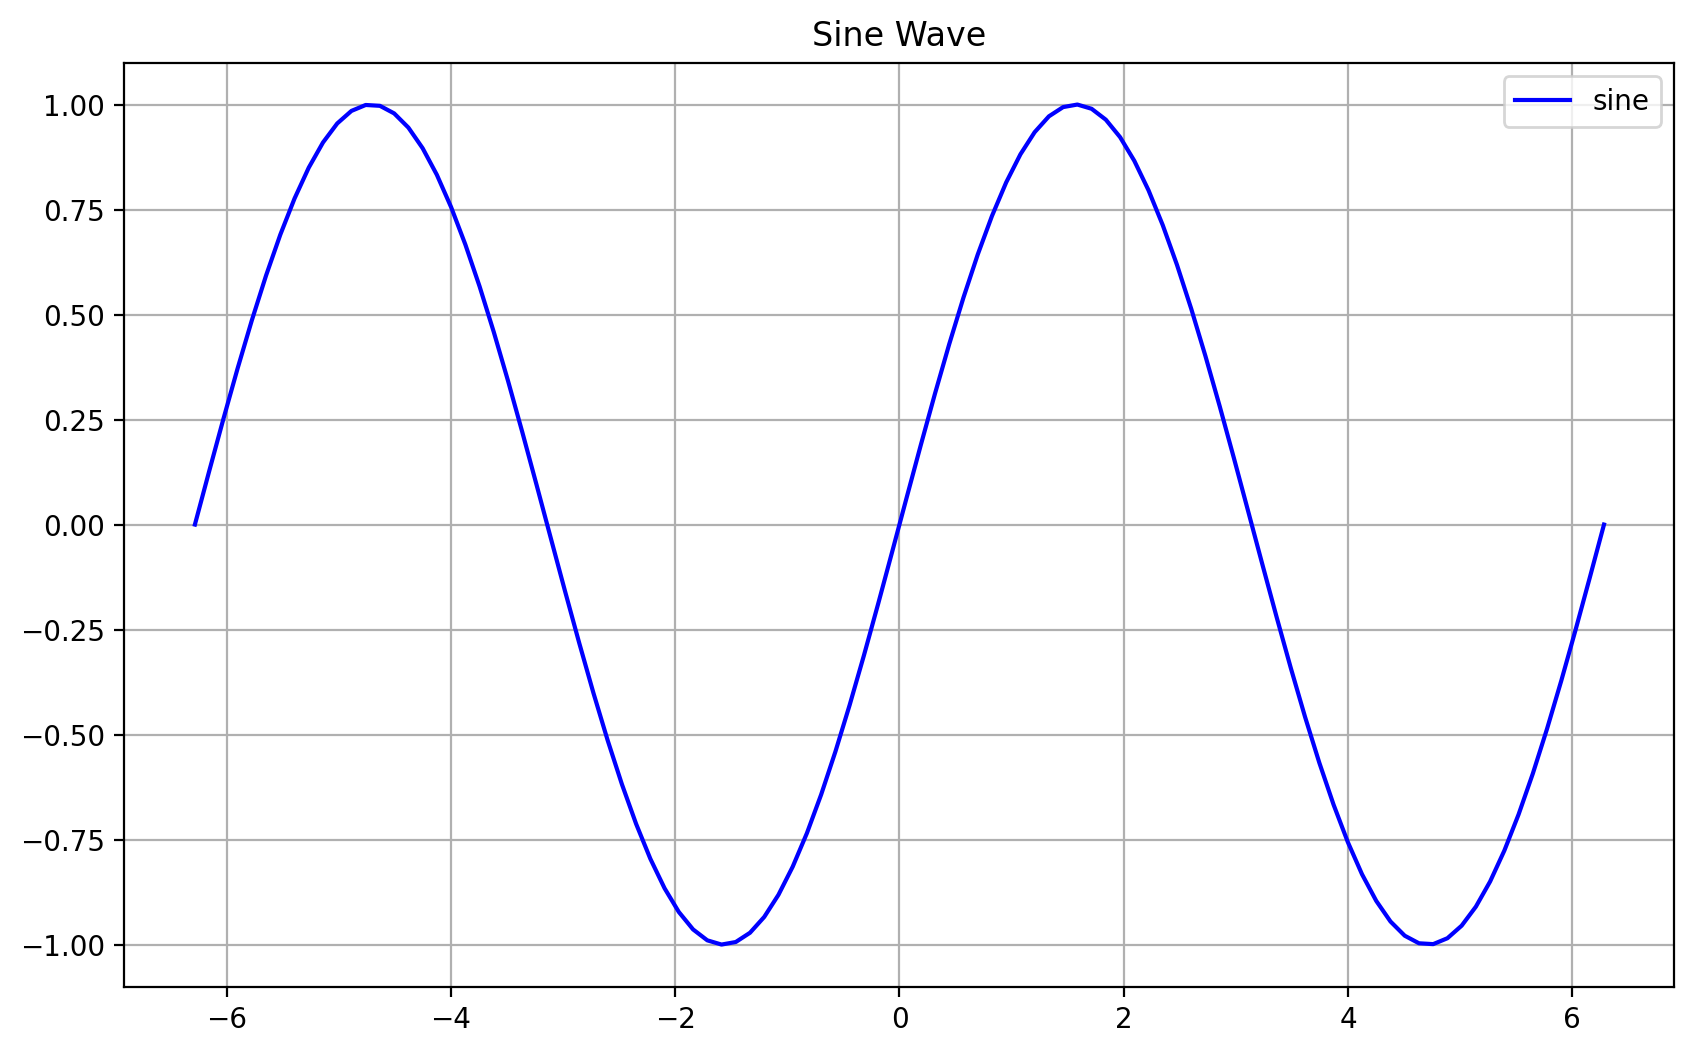

In [37]:
wave_widget = interactive(
    plot_wave_advanced,
    func_type=widgets.RadioButtons(
        options=['sine', 'cosine', 'both'],
        description='Function:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='200px')
    ),
    num_points=widgets.IntSlider(
        value=100,
        min=50,
        max=200,
        step=10,
        description='Points:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    ),
    color=widgets.Dropdown(
        options=['blue', 'red', 'green', 'purple'],
        value='blue',
        description='Color:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='200px'),
        disabled=False
    ),
    show_grid=widgets.Checkbox(
        value=True,
        description='Show Grid',
        style={'description_width': 'initial'}
    )
)

# Organize widgets in a vertical layout
widgets.VBox([
    widgets.HTML(value="<h3>Interactive Plot Controls:</h3>"),
    wave_widget
])